In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# Dummy Classifier

In [4]:
#Dummy submission to register for project
from sklearn.dummy import DummyClassifier

#Data loading
df_train=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
x_test=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

#Preparing data to train
x=df_train.drop('target',axis=1)
y=df_train['target']

#Model implementation
dum=DummyClassifier(random_state=42)
dum.fit(x,y)

y_test=dum.predict(x_test)

"""submission=pd.DataFrame({"id":range(0,y_test.shape[0]),"target":y_test})
submission.to_csv("submission.csv",index=False)"""

'submission=pd.DataFrame({"id":range(0,y_test.shape[0]),"target":y_test})\nsubmission.to_csv("submission.csv",index=False)'

# Exploratory data analysis

In [5]:
#Libraries for visual representation
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Data loading
loaded_data=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")

## Basic Data inspection

In [7]:
#checking the data description i.e. basics stats of data
loaded_data.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
#checking the data
loaded_data.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [9]:
#info about datatypes and count details
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

## Null data inspection in Data

In [10]:
'''how much data is null?
Here poutcome is with most null values and it is more than half of total dataset
and contact here has more than 1/4th of its values as null

based on that both might not be much helpful in training 
'''
loaded_data.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

## Bar graph representation of null data

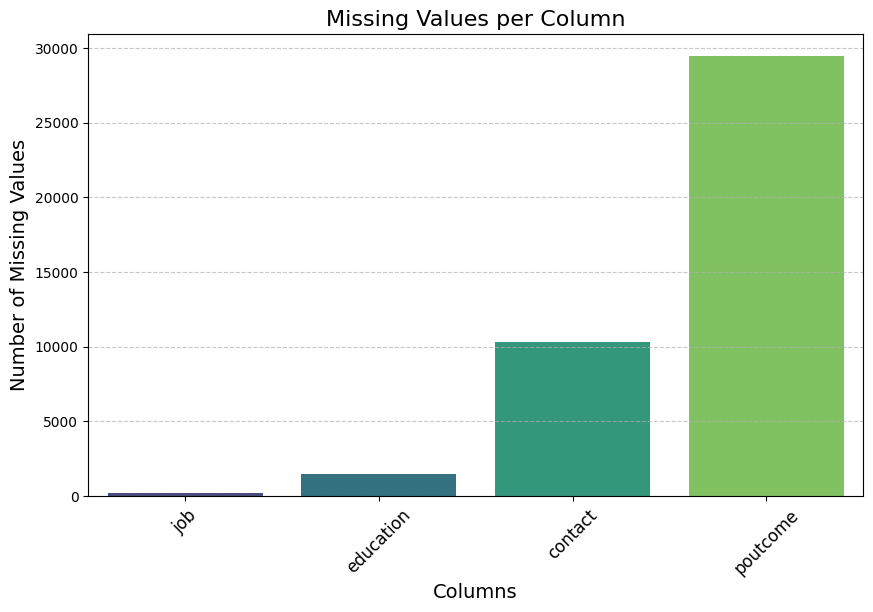

In [11]:
# Calculate the number of missing values
missing_values = loaded_data.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Plot the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values per Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Visual Analysis on Categorical Data

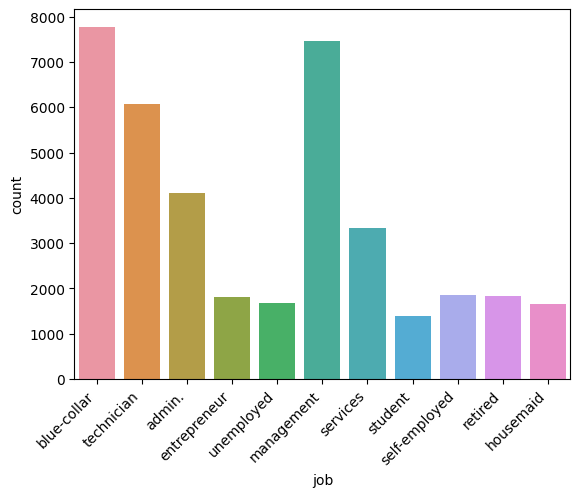

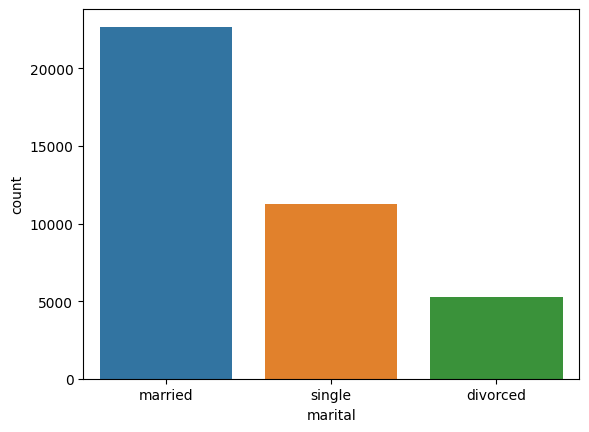

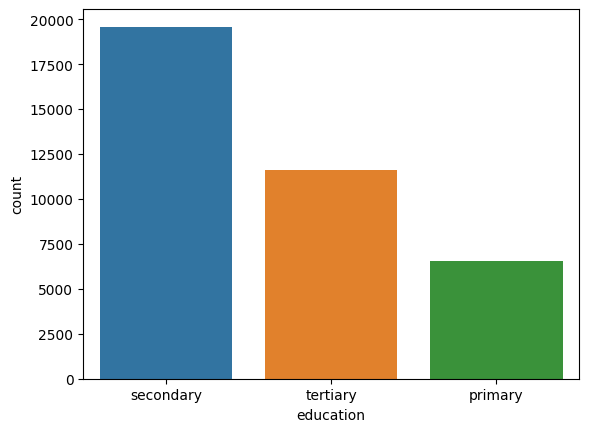

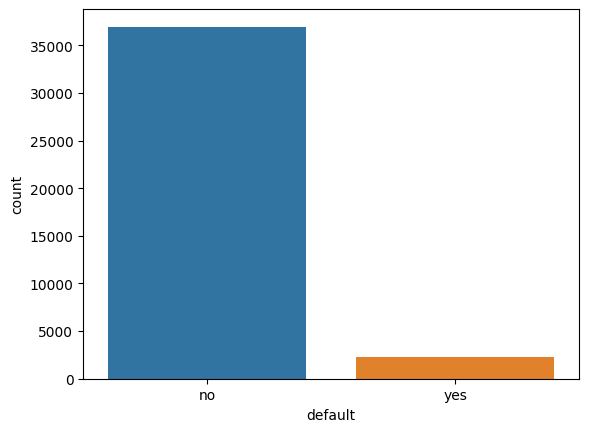

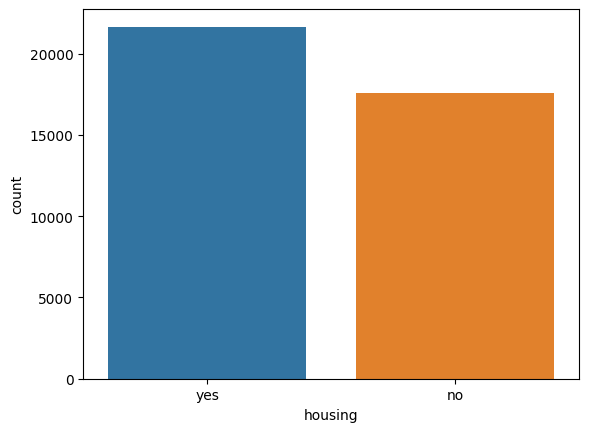

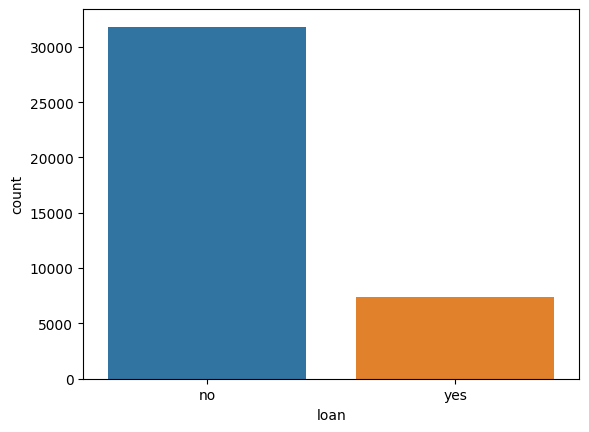

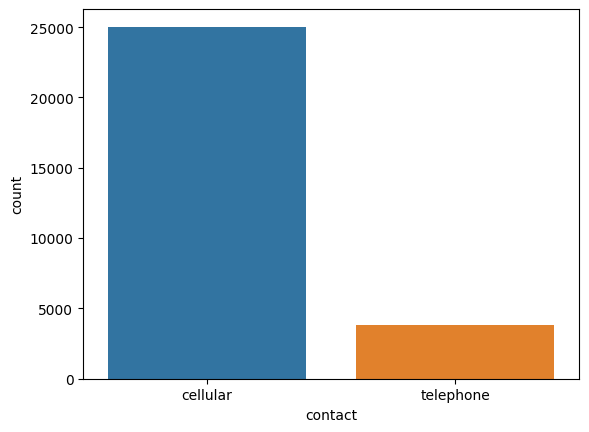

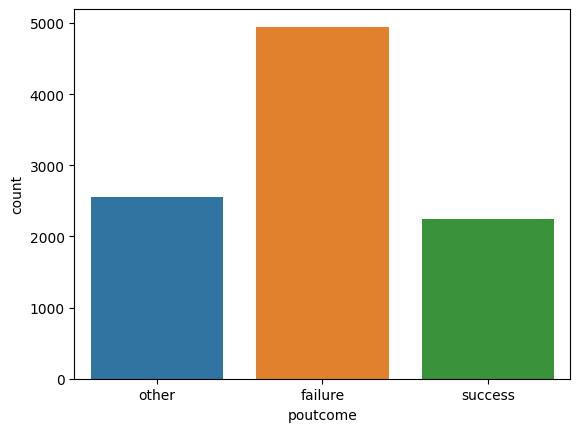

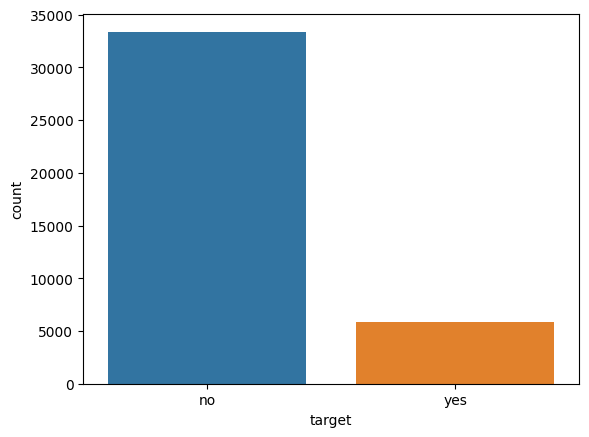

In [12]:
categorical_columns=[ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target']
plt.xticks(rotation=45, ha='right')
for i in categorical_columns:
    sns.countplot(x=i,data=loaded_data)
    plt.show()

## Observations on categorical Data

In [13]:
'''observations in graphs
job :
max->Blue collar
min->Student
people with minimum wage and people who have volatile income are in minority

marital :
max->married 
min->divorced i.e divorced or widowed

education :
max->secondary
min->primary

default :
majority are not in default i.e. they have a good credit score

housing :
most people took a loan 

loan:
most didnt take any personal loan

contact :
1/4th of data is missing 
but if that is ignored then 
most use celluar 
this is'nt an important feature because most people use a cellular connection

poutcome :
most of that data is missing 
but if ignored failure seems most comman

target :
most of the campaigning failed to attract many customers to term deposit
obvious Class imbalance
'''

"observations in graphs\njob :\nmax->Blue collar\nmin->Student\npeople with minimum wage and people who have volatile income are in minority\n\nmarital :\nmax->married \nmin->divorced i.e divorced or widowed\n\neducation :\nmax->secondary\nmin->primary\n\ndefault :\nmajority are not in default i.e. they have a good credit score\n\nhousing :\nmost people took a loan \n\nloan:\nmost didnt take any personal loan\n\ncontact :\n1/4th of data is missing \nbut if that is ignored then \nmost use celluar \nthis is'nt an important feature because most people use a cellular connection\n\npoutcome :\nmost of that data is missing \nbut if ignored failure seems most comman\n\ntarget :\nmost of the campaigning failed to attract many customers to term deposit\nobvious Class imbalance\n"

## Visual Analysis on Numerical Data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


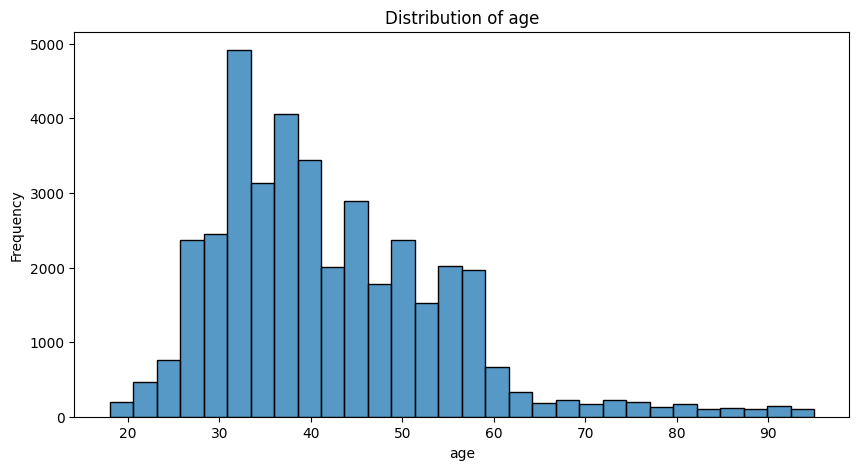

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


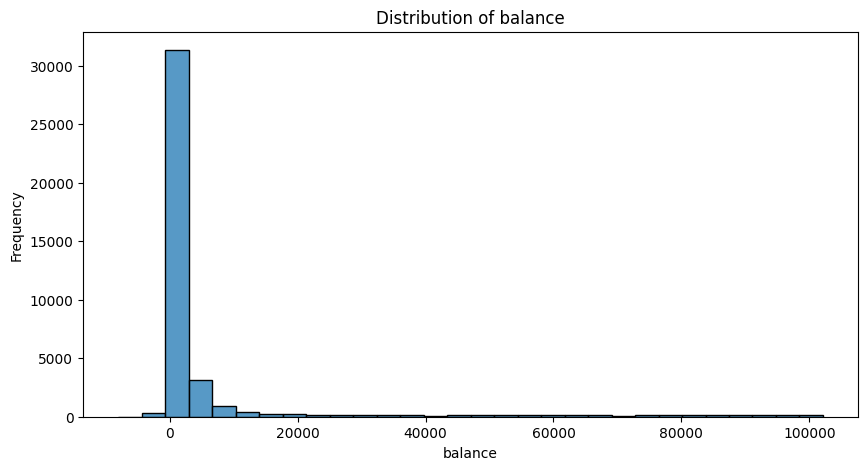

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


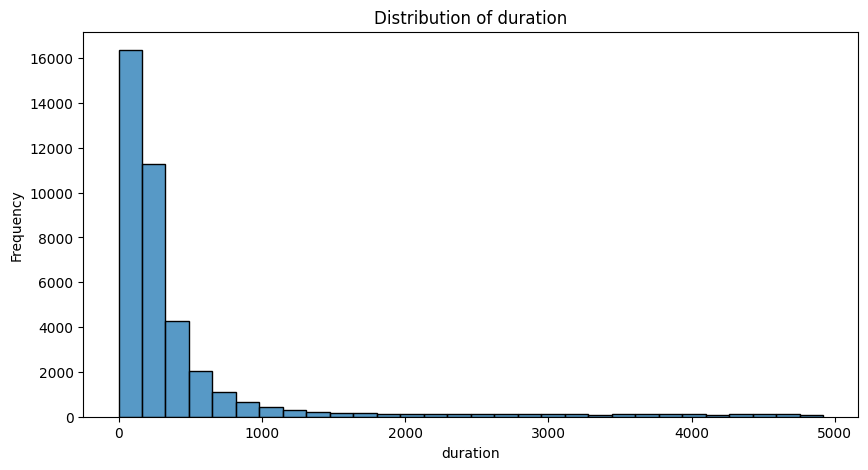

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


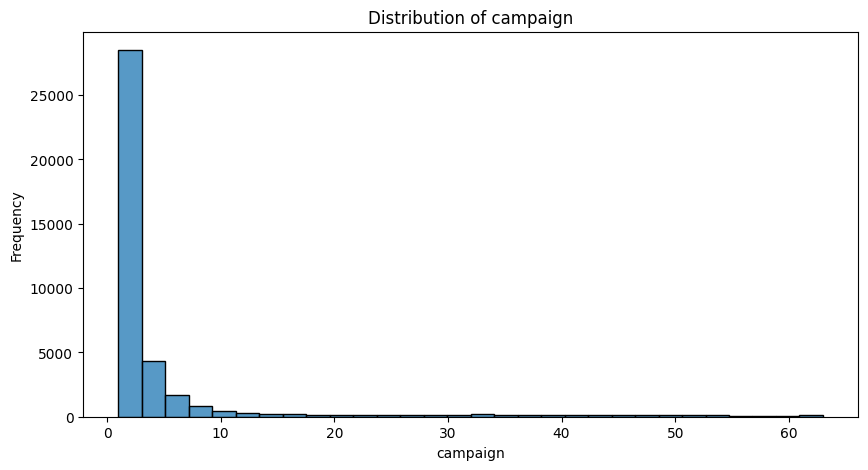

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


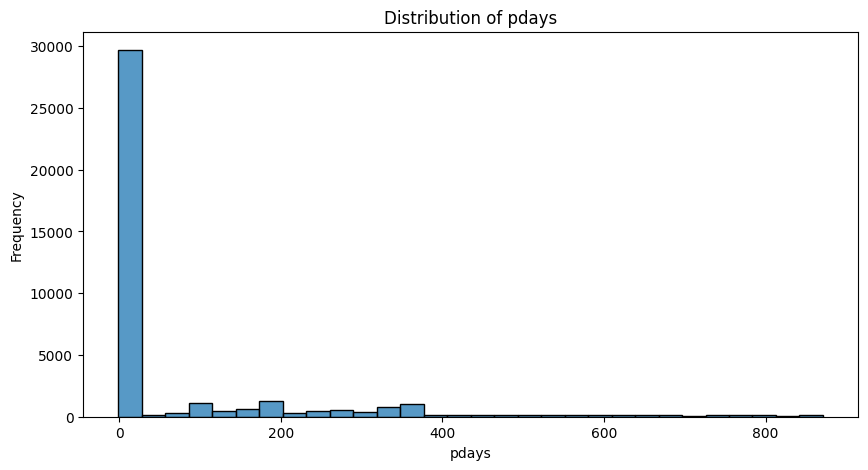

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


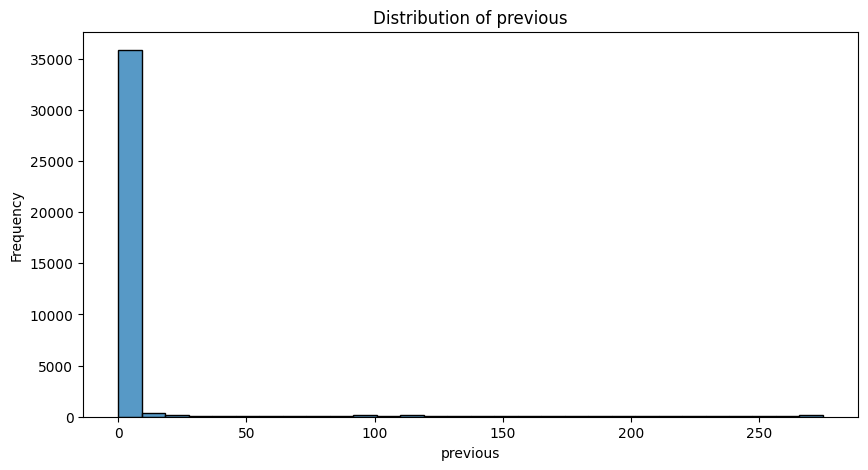

In [14]:
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(loaded_data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Observation on numerica data

In [15]:
'''distribution of age:
most of clients are in between age of 30 to 50
other graphs didnt seem that promising in giving much insights
'''

'distribution of age:\nmost of clients are in between age of 30 to 50\nother graphs didnt seem that promising in giving much insights\n'

## Correlation Heapmap

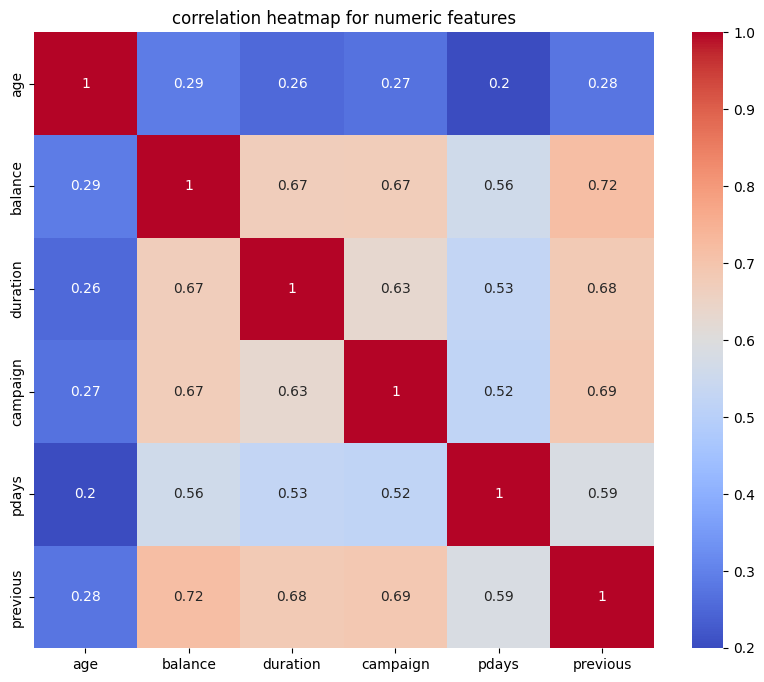

In [16]:
'''correlation heatmap'''
number_data = loaded_data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(number_data.corr(), annot=True, cmap='coolwarm')
plt.title('correlation heatmap for numeric features')
plt.show()

## Observation from heatMap

In [17]:
'''balance and previous has most correlation i.e strong linear relationship
followed by campaign and previous 
while pdays and age are least correlated
'''

'balance and previous has most correlation i.e strong linear relationship\nfollowed by campaign and previous \nwhile pdays and age are least correlated\n'

## conclusion of EDA

In [18]:
'''
how much data is null?
Here poutcome is with most null values and it is more than half of total dataset
and contact here has more than 1/4th of its values as null

based on that both might not be much helpful in training 

observations in graphs
job :
max->Blue collar
min->Student
people with minimum wage and people who have volatile income are in minority

marital :
max->married 
min->divorced i.e divorced or widowed

education :
max->secondary
min->primary

default :
majority are not in default i.e. they have a good credit score

housing :
most people took a loan 

loan:
most didnt take any personal loan

contact :
1/4th of data is missing 
but if that is ignored then 
most use celluarthis is'nt an important feature because most people use a cellular connection

poutcome :
most of that data is missing 
but if ignored failure seems most comman

target :
most of the campaigning failed to attract many customers to term deposit
obvious Class imbalance

distribution of age:
most of clients are in between age of 30 to 50
other graphs didnt seem that promising in giving much insights

balance and previous has most correlation i.e strong linear relationship
followed by campaign and previous 
while pdays and age are least correlated

'''

"\nhow much data is null?\nHere poutcome is with most null values and it is more than half of total dataset\nand contact here has more than 1/4th of its values as null\n\nbased on that both might not be much helpful in training \n\nobservations in graphs\njob :\nmax->Blue collar\nmin->Student\npeople with minimum wage and people who have volatile income are in minority\n\nmarital :\nmax->married \nmin->divorced i.e divorced or widowed\n\neducation :\nmax->secondary\nmin->primary\n\ndefault :\nmajority are not in default i.e. they have a good credit score\n\nhousing :\nmost people took a loan \n\nloan:\nmost didnt take any personal loan\n\ncontact :\n1/4th of data is missing \nbut if that is ignored then \nmost use celluarthis is'nt an important feature because most people use a cellular connection\n\npoutcome :\nmost of that data is missing \nbut if ignored failure seems most comman\n\ntarget :\nmost of the campaigning failed to attract many customers to term deposit\nobvious Class imb

## End of EDA

# Data Preprocessing Approach 1

In [19]:
#Data Loading
train_data=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

## Dropping columns

In [20]:
#Training Data spliting into X train and Y Train
#Dropped columns contact,poutcome Dropped due to present of null values in more than 1/4 part of the data
#Dropped last contact date because it seemed irrelavant to the target column 

x_train=train_data.drop(['last contact date','contact','poutcome','target'],axis=1).copy(deep=True)
pro_y_train = train_data['target'].replace({'yes': 1, 'no': 0}).copy(deep=True)

#keeping test data consistent with training data
x_test=test_data.drop(['last contact date','contact','poutcome'],axis=1).copy(deep=True)

/tmp/ipykernel_30/541095670.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pro_y_train = train_data['target'].replace({'yes': 1, 'no': 0}).copy(deep=True)


## Imports for preprocessing

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer

## Pipeline implementation

In [22]:
# faulty pipeline implementation (Missing a column) in 1st approach

preprocessor = ColumnTransformer(transformers=[
    ('age',Pipeline(steps=[('scaler',StandardScaler())]),['age']),
   ('job',Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())]),['job']),
    ('marital',OneHotEncoder(),['marital']),
   ('education',Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())]),['education']),
    ('default',OneHotEncoder(),['default']),
    ('balance',Pipeline(steps=[('scaler',StandardScaler())]),['balance']),
    ('housing',OneHotEncoder(),['loan']),
    ('duration',Pipeline(steps=[('scaler',StandardScaler())]),['duration']),
    ('passthrough','passthrough',['campaign','pdays','previous'])
])

In [23]:
#applying the pipeline to both training and testing data

pro_x_train=preprocessor.fit_transform(x_train)
pro_x_test=preprocessor.transform(x_test)

# Model implementations

## 1. Random Forest

In [24]:
#import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [25]:
#v35 score=0.67824

#fiting and prediction
random=RandomForestClassifier(random_state=42)

random.fit(pro_x_train,pro_y_train)
pred_train_y1=random.predict(pro_x_train)
pred_test_y1=random.predict(pro_x_test)

'''submission=pd.DataFrame({"id":range(0,pred_test_y1.shape[0]),"target":pred_test_y1})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv",index=False)
submission.head()'''

'''observation: as a base model it performed well on further tuning might score even higher'''

'observation: as a base model it performed well on further tuning might score even higher'

In [26]:
#v33 score=0.70210


rf = RandomForestClassifier()

#Define the parameter grid with some adjusted values
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(np.arange(2, 21)),  
    'min_samples_leaf': list(np.arange(1, 21)),  
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],  
    'n_estimators': [100, 200,1000] 
}

# Initialize RandomizedSearchCV with F1 scoring
'''nrf = RandomizedSearchCV(rf, param_distributions=params, scoring='f1_macro', random_state=42, n_jobs=-1, cv=10)

# Fit the model
nrf.fit(pro_x_train,pro_y_train)

# Output the best parameters and best score
print(nrf.best_params_)
print(nrf.best_score_)

# Get the best estimator
nrf = nrf.best_estimator_

#Predict using best estimator 
y_pred12 = nrf.predict(pro_x_test)


submission=pd.DataFrame({"id":range(0,y_pred12.shape[0]),"target":y_pred12})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv",index=False)
submission.head()'''


'''Observation : On Hyperparameter tuning performance improved not by a large margin 
tho can be considered as a potentail final model model'''

'Observation : On Hyperparameter tuning performance improved not by a large margin \ntho can be considered as a potentail final model model'

## 2. Logistic Regression

In [27]:
#imports
from sklearn.linear_model import LogisticRegression

In [28]:
#v37 score=0.56798


logis2 = LogisticRegression(max_iter=2500)

logis2.fit(pro_x_train, pro_y_train)

pred_test_y22 = logis2.predict(pro_x_test)


'''submission = pd.DataFrame({"id": range(0, pred_test_y22.shape[0]), "target": pred_test_y22})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv", index=False)
submission.head()'''

'''Observation : Scored signicantly less than randomforest and scored poorly so would focus on other models  '''

'Observation : Scored signicantly less than randomforest and scored poorly so would focus on other models  '

## Conclusion

In [29]:
'''After trying alot of models none of them helped improve score to pass the cut off 
Hence we need to retrace our steps back and try new appraoch 
'''

'After trying alot of models none of them helped improve score to pass the cut off \nHence we need to retrace our steps back and try new appraoch \n'

# Data Preprocessing approach 2

In [30]:
#Data loading
train_data2=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
test_data2=pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")

#Columns that were dropped in previous preprocessing werent dropped in this and preprocessed appropriately

## Formating the date

In [31]:
#Date column might play an important role hence its properly formated 
#it needs to be converted into numeric values and year isnt included only month and day 

train_data2['month']=pd.to_datetime(train_data2['last contact date']).dt.month.copy()
train_data2['day']=pd.to_datetime(train_data2['last contact date']).dt.day.copy()
test_data2['month']=pd.to_datetime(test_data2['last contact date']).dt.month.copy()
test_data2['day']=pd.to_datetime(test_data2['last contact date']).dt.day.copy()

## Removing the Date column

In [32]:
#we need to remove old date column and the formatted one

train_data2=train_data2.drop(['last contact date'],axis=1).copy()
b_xtest_data2=test_data2.drop(['last contact date'],axis=1).copy()

In [33]:
#formating the target columns and removing it 
p_ytrain_ = train_data2['target'].replace({'yes': 1, 'no': 0})
b_xtrain_data2=train_data2.drop(['target'],axis=1).copy()

/tmp/ipykernel_30/1992571633.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  p_ytrain_ = train_data2['target'].replace({'yes': 1, 'no': 0})


## Treating the null values and preprocess the data

In [34]:
#imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## Preprocess pipeline

In [35]:
#proper pipeline and no faults unlike the older one

prepro = ColumnTransformer(transformers=[
    ('age','passthrough',['age']),
   ('job',Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())]),['job']),
    ('marital',OneHotEncoder(),['marital']),
   ('education',Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())]),['education']),
    ('default',OneHotEncoder(),['default']),
    ('balance','passthrough',['balance']),
    ('housing',OneHotEncoder(),['housing']),
    ('loan',OneHotEncoder(),['loan']),
    ('contact',Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),('encoder',OneHotEncoder())]),['contact']),
    ('duration','passthrough',['duration']),
    ('passthrough','passthrough',['campaign','pdays','previous']),
    ('poutcome',Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),('encoder',OneHotEncoder())]),['poutcome']),
    ('month',MinMaxScaler(),['month']),
    ('day',MinMaxScaler(),['day']),
    
])

In [36]:
#applying the pipeline
p_xtrain_data2=prepro.fit_transform(b_xtrain_data2)
p_xtest_data2=prepro.transform(b_xtest_data2)

# Model implementations

## 1. Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import f1_score

In [38]:
#Hyperparameter tuning for random forest with new approach 



rf = RandomForestClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': list(np.arange(2, 21)),  
    'min_samples_leaf': list(np.arange(1, 21)),   
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8],  
    'n_estimators': [100, 200,1000],
    'class_weight':['balanced']
    
}


nrf = RandomizedSearchCV(rf,verbose=2, param_distributions=params, scoring='f1_macro', random_state=42, n_jobs=-1, cv=10)


'''nrf.fit(p_xtrain_data2,p_ytrain_)

print(nrf.best_params_)
print(nrf.best_score_)

nrf = nrf.best_estimator_'''

'nrf.fit(p_xtrain_data2,p_ytrain_)\n\nprint(nrf.best_params_)\nprint(nrf.best_score_)\n\nnrf = nrf.best_estimator_'

In [39]:
#48 s=0.76665 
# RandomForest model
rf = RandomForestClassifier(
    n_estimators=200,          
    min_samples_split=13,      
    min_samples_leaf=1,       
    max_features='sqrt',       
    criterion='entropy',      
    class_weight='balanced',  
    random_state=43           
)
# Fit the model with training data
rf.fit(p_xtrain_data2,p_ytrain_)


y_pred = rf.predict(p_xtest_data2)


submission=pd.DataFrame({"id":range(0,y_pred.shape[0]),"target":y_pred})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv",index=False)

In [40]:
#applied Models of random forest

#v38 with n_estimators 200 score=0.72285

#v39 with n_estimators 800 score=0.72018

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# Parameters from the randomized search
'''params = {
    'n_estimators': 800,
    'min_samples_split': 20,
    'min_samples_leaf': 18,
    'max_features': 0.8,
    'criterion': 'entropy'
}

# Initialize the RandomForestClassifier with the given parameters
rf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'],
    criterion=params['criterion']
)
'''
# Fit the model to the training data
'''rf.fit(p_xtrain_data2, p_ytrain_data2)
pred_test_y38=rf.predict(p_xtest_data2)

'''
'''submission=pd.DataFrame({"id":range(0,pred_test_y38.shape[0]),"target":pred_test_y38})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv",index=False)
submission.head()'''

'''observation : Scored improved upto 0.72 with the new approach which means we are in the right direction
by further tuning and improvement we might be able to achieve above 0.75
'''

'observation : Scored improved upto 0.72 with the new approach which means we are in the right direction\nby further tuning and improvement we might be able to achieve above 0.75\n'

In [41]:
#v42 score=0.75886


params = {
    'n_estimators': 200,
    'min_samples_split': 20,
    'min_samples_leaf': 18,
    'max_features': 0.8,
    'criterion': 'entropy'
}


rf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'],
    criterion=params['criterion'],
    class_weight='balanced'
)

# Fit the model to the training data
rf.fit(p_xtrain_data2, p_ytrain_ )
pred_test_y42=rf.predict(p_xtest_data2)


'''submission=pd.DataFrame({"id":range(0,pred_test_y42.shape[0]),"target":pred_test_y42})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv",index=False)
submission.head()'''


'''Observation: Due to overlooking class imbalance in label we werent able to achieve desired score 
but after handling the imbalance the hyper tuned model was finally able to achieve a score above 0.75 
This is a final Model 
'''

'Observation: Due to overlooking class imbalance in label we werent able to achieve desired score \nbut after handling the imbalance the hyper tuned model was finally able to achieve a score above 0.75 \nThis is a final Model \n'

## 2. LogisticRegression

In [42]:
#imports

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import pandas as pd
from scipy.stats import uniform

In [43]:
#v44 score=0.71005

log_reg = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced') 

log_reg.fit(p_xtrain_data2, p_ytrain_ )

pred_test_log = log_reg.predict(p_xtest_data2)

'''
submission=pd.DataFrame({"id":range(0,pred_test_log.shape[0]),"target":pred_test_log})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv",index=False)
submission.head()'''

'''observation : After new approach and balancing the class it seems lgr performed excellent and is 
has potential 
'''

'observation : After new approach and balancing the class it seems lgr performed excellent and is \nhas potential \n'

In [44]:
# hypter parameter tuning for logistic regression 

'''
param_dist = {
    'C': uniform(0.001, 100),            
    'penalty': ['l1', 'l2'],                
    'solver': ['liblinear', 'saga'],        
    'max_iter': [ 2000, 3000],        
    'class_weight': ['balanced']    
}

# Initialize Logistic Regression model
model = LogisticRegression(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,                               
    scoring='f1_macro',                      
    cv=5,                                    
    verbose=1,
    random_state=42,
    n_jobs=-1                                 
)

# Fit the randomized search to the training data
random_search.fit(p_xtrain_data2, p_ytrain_data2)

# Get the best model parameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
'''

'\nparam_dist = {\n    \'C\': uniform(0.001, 100),            \n    \'penalty\': [\'l1\', \'l2\'],                \n    \'solver\': [\'liblinear\', \'saga\'],        \n    \'max_iter\': [ 2000, 3000],        \n    \'class_weight\': [\'balanced\']    \n}\n\n# Initialize Logistic Regression model\nmodel = LogisticRegression(random_state=42)\n\n# Set up RandomizedSearchCV\nrandom_search = RandomizedSearchCV(\n    estimator=model,\n    param_distributions=param_dist,\n    n_iter=50,                               \n    scoring=\'f1_macro\',                      \n    cv=5,                                    \n    verbose=1,\n    random_state=42,\n    n_jobs=-1                                 \n)\n\n# Fit the randomized search to the training data\nrandom_search.fit(p_xtrain_data2, p_ytrain_data2)\n\n# Get the best model parameters\nbest_params = random_search.best_params_\nprint("Best hyperparameters:", best_params)\n'

In [45]:
#45 score=0.72989

model = LogisticRegression(
    C=0.01,              
    penalty='l1',         
    solver='liblinear',   
    max_iter=2000,        
    class_weight='balanced',  
    random_state=42       
)

# Fit the model to the training data
model.fit(p_xtrain_data2,p_ytrain_ )

# Predict on the test data
pred_test_y45 = model.predict(p_xtest_data2)

# Prepare submission
'''
submission = pd.DataFrame({"id": range(0, pred_test_y45.shape[0]), "target": pred_test_y45})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv", index=False)
submission.head()
'''

'''observation : It seems main culprit was class imbalance for logistic regression scoring so low
when handled properly logistics regression performed excellent with proper tuning and can be considered 
potentail model '''

'observation : It seems main culprit was class imbalance for logistic regression scoring so low\nwhen handled properly logistics regression performed excellent with proper tuning and can be considered \npotentail model '

## 3. XGBoost

In [46]:
#imports
from xgboost import XGBClassifier

In [47]:
#v43  score=0.75413 

scale_pos_weight = len(p_ytrain_[p_ytrain_ == 0]) / len(p_ytrain_[p_ytrain_== 1])

model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
model.fit(p_xtrain_data2, p_ytrain_ )

pred_test_y43=model.predict(p_xtest_data2)


'''submission=pd.DataFrame({"id":range(0,pred_test_y43.shape[0]),"target":pred_test_y43})
submission['target'] = submission['target'].replace({0: 'no', 1: 'yes'})
submission.to_csv("submission.csv",index=False)
submission.head()'''

'''Observation : XGboost is the best performing model out of all models tried even without hyperparameter
tuning it performs great and gives a score above 0.75 
here class imbalance is also handles using the scale_pos_weight ration
it outperforms a base randomforest 
'''

'Observation : XGboost is the best performing model out of all models tried even without hyperparameter\ntuning it performs great and gives a score above 0.75 \nhere class imbalance is also handles using the scale_pos_weight ration\nit outperforms a base randomforest \n'

## Conclusion

In [48]:
'''Best Model is XGboost 
2nd best is random foreset with hyper paramerter tuning
'''

'Best Model is XGboost \n2nd best is random foreset with hyper paramerter tuning\n'

## Camparision of models

### Imports

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [50]:
scale_pos_weight = len(p_ytrain_[p_ytrain_ == 0]) / len(p_ytrain_[p_ytrain_== 1])
models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBOOST": XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=42),
}

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    p_xtrain_data2, p_ytrain_, test_size=0.2, random_state=42,stratify=p_ytrain_
)

# Compare models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions
    f1 = f1_score(y_test, predictions, average="macro")  # Calculate F1 score
    results[name] = f1

# Display results
for model, score in results.items():
    print(f"{model}: F1 Score = {score:.4f}")

Random Forest: F1 Score = 0.6840
Logistic Regression: F1 Score = 0.7109
Support Vector Machine: F1 Score = 0.7064
Decision Tree: F1 Score = 0.6927
K-Nearest Neighbors: F1 Score = 0.6602
XGBOOST: F1 Score = 0.7644


In [53]:
help(SVC)

NameError: name 'svc' is not defined